# Machine Learning: Classification, Regression and Clustering 
### github : https://github.com/pdeitel/IntroToPython/tree/master/examples/ch15 
### book   : http://localhost:8888/files/2241016309/Python%202/Python%20Book.pdf 
            (only works in lab comp)

In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


### 15.2.2 Loading the Dataset
The **load_digits** function from the **sklearn.datasets module** returns a scikit-learn
**Bunch** object containing the digits data and information about the Digits dataset (called
**metadata**):

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

**Bunch** is a subclass of dict that has additional attributes for interacting with the dataset.
  
#### Displaying the Description  
  
The Digits dataset bundled with scikit-learn is a subset of the UCI (University of California Irvine) ML hand-written digits dataset at:
> http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits  
  
The original UCI dataset contains 5620 samples—3823 for training and 1797 for testing. The version of the dataset bundled with scikit-learn contains only the 1797 testing samples. A Bunch’s **DESCR attribute** contains a description of the dataset. According to the Digits dataset’s description4, each sample has 64 features (as specified by Number of Attributes) that represent an 8-by-8 image with pixel values in the range 0–16 (specified by Attribute Information). This dataset has no missing values (as specified by Missing Attribute Values). The 64 features may seem like a lot, but real-world datasets can sometimes have hundreds, thousands or even millions of features. 

In [4]:
print(digits.DESCR)    # DESCR bole to description

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### Checking the Sample and Target Sizes  
The Bunch object’s **data** and **target attributes** are NumPy arrays:  
* The data array contains the 1797 samples (the digit images), each with 64 features, having values in the range 0–16, representing pixel intensities. With Matplotlib, we’ll visualize these intensities in grayscale shades from white (0) to black (16):  
* The target array contains the images’ labels—that is, the classes indicating which digit each image represents. The array is called target because, when you make predictions, you’re aiming to “hit the target” values. To see labels of samples throughout the dataset, let’s display the target values of every 100th sample:

In [5]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

We can confirm the number of samples and features (per sample) by looking at the
data array’s shape attribute, which shows that there are 1797 rows (samples) and 64 columns (features):

In [6]:
 digits.data.shape

(1797, 64)

You can confirm that the number of target values matches the number of samples by looking at the target array’s shape:

In [7]:
digits.target.shape

(1797,)

#### A Sample Digit Image
Each image is two-dimensional—it has a width and a height in pixels. The Bunch object
returned by load_digits contains an images attribute—an array in which each element
is a two-dimensional 8-by-8 array representing a digit image’s pixel intensities. Though
the original dataset represents each pixel as an integer value from 0–16, scikit-learn stores
these values as floating-point values (NumPy type float64). For example, here’s the twodimensional array representing the sample image at index 13:

In [8]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

#### Preparing the Data for Use with Scikit-Learn
Scikit-learn’s machine-learning algorithms require samples to be stored in a two-dimensional array of floating-point values (or two-dimensional array-like collection, such as a list
of lists or a pandas DataFrame):  
* Each row represents one sample.  
* Each column in a given row represents one feature for that sample.  
To represent every sample as one row, multi-dimensional data like the two-dimensional
image array shown in previous shell must be flattened into a one-dimensional array.  
  
The load_digits function returns the preprocessed data ready
for machine learning. The Digits dataset is numerical, so load_digits simply flattens each
image’s two-dimensional array into a one-dimensional array. For example, the 8-by-8
array digits.images[13] shown in previous shell corresponds to the 1-by-64 array digits.data[13] shown below: 

In [9]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

### 15.2.3 Visualizing the Data  
  
You should always familiarize yourself with your data. This process is called **data exploration**. For the digit images, you can get a sense of what they look like by displaying them with the Matplotlib implot function.  
  
#### Creating the Diagram:

In [10]:
 import matplotlib.pyplot as plt

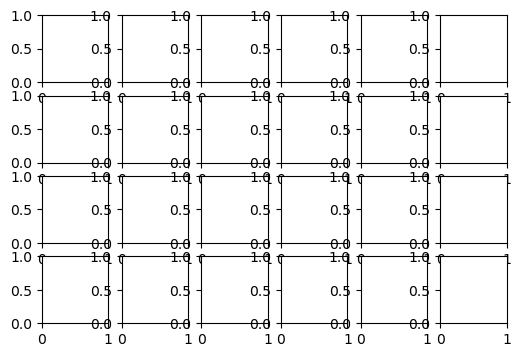

In [11]:
 figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

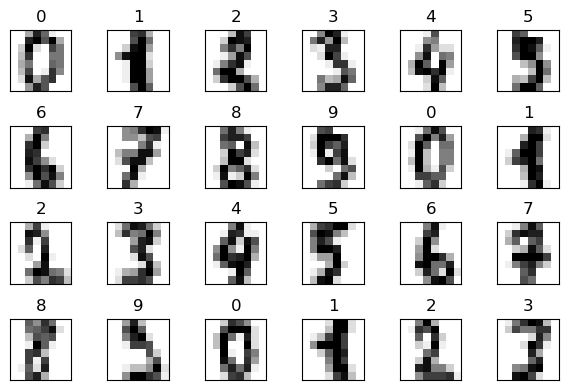

In [12]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

### Displaying Each Image and Removing the Axes Labels 

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout() 

### 15.2.4 Splitting the Data for Training and Testing  
  
You typically train a machine-learning model with a subset of a dataset. Typically, **the
more data you have for training, the better you can train the model**. It’s important to set
aside a portion of your data for testing, so you can evaluate a model’s performance using
data that the model has not yet seen. Once you’re confident that the model is performing
well, you can use it to make predictions using new data it hasn’t seen.  
  
We first break the data into a **training set** and a **testing set** to prepare to train and test
the model. The function **train_test_split** from the **sklearn.model_selection** module
shuffles the data to randomize it, then splits the samples in the data array and the target
values in the target array into training and testing sets. This helps ensure that the training
and testing sets have similar characteristics. The shuffling and splitting is performed conveniently for you by a **ShuffleSplit** object from the sklearn.model_selection module.  
  
Function train_test_split returns a tuple of four elements in which the first two are the
samples split into training and testing sets, and the last two are the corresponding target
values split into training and testing sets. By convention, uppercase X is used to represent
the samples, and lowercase y is used to represent the target values: 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

We assume the data has **balanced classes**—that is, the samples are divided evenly among
the classes. This is the case for each of scikit-learn’s bundled classification datasets. Unbalanced classes could lead to incorrect results.  
  
In the “Functions” chapter, you saw how to seed a random-number generator for
reproducibility. In machine-learning studies, this helps others confirm your results by
working with the same randomly selected data. Function train_test_split provides the
keyword argument random_state for reproducibility. When you run the code in the future
with the same seed value, train_test_split will select the same data for the training set
and the same data for the testing set. We chose the seed value (11) arbitrarily.  
  
#### Training and Testing Set Sizes  
Looking at X_train’s and X_test’s shapes, you can see that, by default, train_test_split reserves 75% of the data for training and 25% for testing:   

In [15]:
X_train.shape

(1347, 64)

In [16]:
X_test.shape

(450, 64)

To specify different splits, you can set the sizes of the testing and training sets with the train_test_split function’s keyword arguments test_size and train_size. Use floating-point values from 0.0 through 1.0 to specify the percentages of the data to use for each.  
You can use integer values to set the precise numbers of samples. If you specify one of these keyword arguments, the other is inferred. For example, the statement
```python
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, digits.target, random_state=11, test_size=0.20)
```  
specifies that 20% of the data is for testing, so train_size is inferred to be 0.80.  
  
### 15.2.5 Creating the Model  
  
 The **KNeighborsClassifier** estimator (module **sklearn.neighbors**) implements the knearest neighbors algorithm. First, we create the KNeighborsClassifier estimator object: 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier()

To create an estimator, you simply create an object. The internal details of how this object
implements the k-nearest neighbors algorithm are hidden in the object. You’ll simply call
its methods. This is the essence of Python object-based programming.

### 15.2.6 Training the Model   
  
Next, we invoke the KNeighborsClassifier object’s **fit method**, which loads the sample
training set (X_train) and target training set (y_train) into the estimator:

In [19]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

For most, scikit-learn estimators, the fit method loads the data into the estimator
then uses that data to perform complex calculations behind the scenes that learn from the
data and train the model. The KNeighborsClassifier’s fit method just loads the data
into the estimator, because k-NN actually has no initial learning process. The estimator is
said to be **lazy** because its work is performed only when you use it to make predictions. In
this and the next chapter, you’ll use lots of models that have significant training phases. In
the real-world machine-learning applications, it can sometimes take minutes, hours, days
or even months to train your models. We’ll see in the next chapter, “Deep Learning,” that
special-purpose, high-performance hardware called GPUs and TPUs can significantly
reduce model training time.  
  
As shown in prev shell's output, the fit method returns the estimator, so IPython
displays its string representation, which includes the estimator’s default settings. The
n_neighbors value corresponds to k in the k-nearest neighbors algorithm. By default, a
KNeighborsClassifier looks at the five nearest neighbors to make its predictions. For
simplicity, we generally use the default estimator settings. For KNeighborsClassifier,
these are described at:  
> http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
  
Many of these settings are beyond the scope of this book. In Part 2 of this case study, we’ll
discuss how to choose the best value for n_neighbors. 
  
### 15.2.7 Predicting Digit Classes  
  
Now that we’ve loaded the data into the KNeighborsClassifier, we can use it with the test samples to make predictions. Calling the estimator’s **predict method** with X_test as an argument returns an array containing the predicted class of each test image: 

In [20]:
predicted = knn.predict(X=X_test)

In [21]:
expected = y_test

Let’s look at the predicted digits vs. expected digits for the first 20 test samples: 

In [22]:
 predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [23]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

As you can see, in the first 20 elements, only the predicted and expected arrays’ values at index 18 do not match. We expected a 3, but the model predicted a 5.  
Let’s use a list comprehension to locate all the incorrect predictions for the entire test set—that is, the cases in which the predicted and expected values do not match: 

In [24]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [25]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

The list comprehension uses zip to create tuples containing the corresponding elements
in predicted and expected. We include a tuple in the result only if its p (the predicted
value) and e (the expected value) differ—that is, the predicted value was incorrect. In this
example, the estimator incorrectly predicted only 10 of the 450 test samples. So the prediction accuracy of this estimator is an impressive 97.78%, even though we used only the
estimator’s default parameters.   
  
## 15.3 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 2  
  
In this section, we continue the digit classification case study. We’ll:  
* evaluate the k-NN classification estimator’s accuracy,  
* execute multiple estimators and can compare their results so you can choose the best one(s), and  
* show how to tune k-NN’s hyperparameter k to get the best performance out of a KNeighborsClassifier.  
  
### 15.3.1 Metrics for Model Accuracy   
Once you’ve trained and tested a model, you’ll want to measure its accuracy. Here, we’ll look at two ways of doing this—a classification estimator’s score method and a confusion matrix. 
  
#### Estimator Method `score`  
Each estimator has a **score** method that returns an indication of how well the estimator performs for the test data you pass as arguments. For classification estimators, this method returns the prediction accuracy for the test data:

In [26]:
 print(f'{knn.score(X_test, y_test):.2%}')

97.78%


The kNeighborsClassifier’s with its default k (that is, n_neighbors=5) achieved 97.78% prediction accuracy. Shortly, we’ll perform hyperparameter tuning to try to determine the optimal value for k, hoping that we get even better accuracy.  
  
#### Confusion Matrix  
Another way to check a classification estimator’s accuracy is via a **confusion matrix**, which shows the correct and incorrect predicted values (also known as the hits and misses) for a given class. Simply call the function **confusion_matrix** from the **sklearn.metrics module**, passing the expected classes and the predicted classes as arguments, as in: 

In [27]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

The y_true keyword argument specifies the test samples’ actual classes. People looked at the dataset’s images and labeled them with specific classes (the digit values). The y_pred keyword argument specifies the predicted digits for those test images.   
  
Below is the confusion matrix produced by the preceding call. The correct predictions are shown on the diagonal from top-left to bottom-right. This is called the **principal diagonal**. The nonzero values that are not on the principal diagonal indicate incorrect predictions: 

In [28]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

Each row represents one distinct class—that is, one of the digits 0–9. The columns within a row specify how many of the test samples were classified into each distinct class.  
  
For example, row 0:
> [45, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
  
represents the digit 0 class. The columns represent the ten possible target classes 0 through 9. Because we’re working with digits, the classes (0–9) and the row and column index numbers (0–9) happen to match. According to row 0, 45 test samples were classified as the digit 0, and none of the test samples were misclassified as any of the digits 1 through 9. So 100% of the 0s were correctly predicted.  
  
On the other hand, consider row 8 which represents the results for the digit 8:
> [ 0, 1, 1, 2, 0, 0, 0, 0, 39, 1]  
  
* The 1 at column index 1 indicates that one 8 was incorrectly classified as a 1.  
* The 1 at column index 2 indicates that one 8 was incorrectly classified as a 2.  
* The 2 at column index 3 indicates that two 8s were incorrectly classified as 3s.  
* The 39 at column index 8 indicates that 39 8s were correctly classified as 8s.  
* The 1 at column index 9 indicates that one 8 was incorrectly classified as a 9.  
  
So the algorithm correctly predicted 88.63% (39 of 44) of the 8s. Earlier we saw that the
overall prediction accuracy of this estimator was 97.78%. The lower prediction accuracy
for 8s indicates that they’re apparently harder to recognize than the other digits.
  
#### Classification Report  
  
The sklearn.metrics module also provides function **classification_report**, which produces a table of **classification metrics** based on the expected and predicted values:

In [29]:
 from sklearn.metrics import classification_report

In [30]:
names = [str(digit) for digit in digits.target_names]

In [31]:
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In the report:  
* precision is the total number of correct predictions for a given digit divided by the total number of predictions for that digit. You can confirm the precision by looking at each column in the confusion matrix. For example, if you look at column index 7, you’ll see 1s in rows 3 and 4, indicating that one 3 and one 4 were incorrectly classified as 7s and a 45 in row 7 indicating the 45 images were correctly classified as 7s. So the precision for the digit 7 is 45/47 or 0.96.  
* recall is the total number of correct predictions for a given digit divided by the total number of samples that should have been predicted as that digit. You can confirm the recall by looking at each row in the confusion matrix. For example, if you look at row index 8, you’ll see three 1s and a 2 indicating that some 8s were incorrectly classified as other digits and a 39 indicating that 39 images were correctly classified. So the recall for the digit 8 is 39/44 or 0.89.  
* f1-score—This is the average of the precision and the recall.  
* support—The number of samples with a given expected value. For example, 50 samples were labeled as 4s, and 38 samples were labeled as 5s.  
  
For details on the averages displayed at the bottom of the report, see:
>http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html  
  
#### Predicitng from hand-drawn image:  

In [32]:
from PIL import Image
import numpy as np

# Load the hand-drawn image
image_path = "20250319_104940.jpg"  # replace with the path to your image
image = Image.open(image_path)

# Convert the image to grayscale (if it is in color)
image = image.convert('L')

# Resize the image to match the size of the training images (e.g., 28x28)
image = image.resize((8, 8))

image.show()

# Convert the image to a numpy array and flatten it to a 1D array
image_array = np.array(image).flatten()

# Normalize the image (assuming pixel values were scaled in training)
# image_array = image_array / 255.0  # scaling to [0, 1] if needed


In [33]:
# Predict the digit using the trained KNN model
predicted_label = knn.predict([image_array])  # We pass the image as a 2D array with shape (1, 784)
print(f"Predicted label: {predicted_label[0]}")

Predicted label: 1


In [34]:
print(image_array.shape) 

(64,)


#### Visualizing the Confusion Matrix  
A **heat map** displays values as colors, often with values of higher magnitude displayed as more intense colors. Seaborn’s graphing functions work with two-dimensional data. When using a pandas DataFrame as the data source, Seaborn automatically labels its visualizations using the column names and row indices. Let’s convert the confusion matrix into a DataFrame, then graph it: 

In [35]:
import pandas as pd

In [36]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

In [37]:
import seaborn as sns

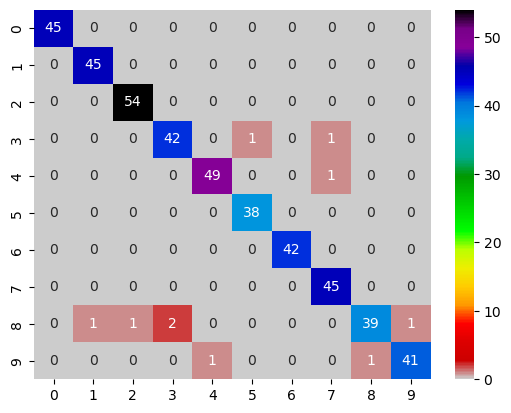

In [38]:
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

The Seaborn function **heatmap** creates a heat map from the specified DataFrame. The
keyword argument annot=True (short for “annotation”) displays a color bar to the right
of the diagram, showing how the values correspond to the heat map’s colors. The
cmap='nipy_spectral_r' keyword argument specifies which color map to use. We used
the nipy_spectral_r color map with the colors shown in the heat map’s color bar. When
you display a confusion matrix as a heat map, the principal diagonal and the incorrect predictions stand out nicely. 

### 15.3.2 K-Fold Cross-Validation  
**K-fold cross-validation** enables you to use all of your data for both training and testing, to get a better sense of how well your model will make predictions for new data by repeatedly training and testing the model with different portions of the dataset. K-fold cross-validation splits the dataset into k equal-size folds (this k is unrelated to k in the k-nearest neighbors algorithm). You then repeatedly train your model with k – 1 folds and test the model with the remaining fold. For example, consider using k = 10 with folds numbered 1 through 10. With 10 folds, we’d do 10 successive training and testing cycles:
* First, we’d train with folds 1–9, then test with fold 10.  
* Next, we’d train with folds 1–8 and 10, then test with fold 9.  
* Next, we’d train with folds 1–7 and 9–10, then test with fold 8.  
This training and testing cycle continues until each fold has been used to test the model.  
  
#### KFold Class  
Scikit-learn provides the **KFold class** and the **cross_val_score function** (both in the module sklearn.model_selection) to help you perform the training and testing cycles described above. Let’s perform k-fold cross-validation with the Digits dataset and the KNeighborsClassifier created earlier. First, create a KFold object:

In [39]:
from sklearn.model_selection import KFold

In [40]:
 kfold = KFold(n_splits=10, random_state=11, shuffle=True)

The keyword arguments are:   
* n_splits=10, which specifies the number of folds.   
* random_state=11, which seeds the random number generator for reproducibility.    
* shuffle=True, which causes the KFold object to randomize the data by shuffling it before splitting it into folds. This is particularly important if the samples might be ordered or grouped. For example, the Iris dataset we’ll use later in this chapter has 150 samples of three Iris species—the first 50 are Iris setosa, the next 50 are Iris versicolor and the last 50 are Iris virginica. If we do not shuffle the samples, then the training data might contain none of a particular Iris species and the test data might be all of one species.  
  
#### Using the KFold Object with Function cross_val_score
Next, use function cross_val_score to train and test your model:

In [41]:
 from sklearn.model_selection import cross_val_score

In [42]:
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

The keyword arguments are:  
* estimator=knn, which specifies the estimator you’d like to validate.  
* X=digits.data, which specifies the samples to use for training and testing.  
* y=digits.target, which specifies the target predictions for the samples.  
* cv=kfold, which specifies the cross-validation generator that defines how to split the samples and targets for training and testing.  
Function cross_val_score returns an array of accuracy scores—one for each fold. As you can see below, the model was quite accurate. Its lowest accuracy score was 0.97777778 (97.78%) and in one case it was 100% accurate in predicting an entire fold:

In [43]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

Once you have the accuracy scores, you can get an overall sense of the model’s accuracy by calculating the mean accuracy score and the standard deviation among the 10 accuracy scores (or whatever number of folds you choose): 

In [44]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [45]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%


On average, the model was 98.72% accurate—even better than the 97.78% we achieved
when we trained the model with 75% of the data and tested the model with 25% earlier.